# Linear Regression

### Importing packages

In [19]:
import pandas as pd
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels
from scipy.stats import iqr
from sklearn.model_selection import train_test_split
from scipy import stats
from scipy.stats import pearsonr
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error
from math import sqrt

### Loading Dataset

In [2]:
data = pd.read_csv('salary.csv')

In [3]:
data.head()

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
0,53000.0,0,0,0,1.17,1,0,1,1,3,0
1,58000.0,1,0,0,1.24,1,0,1,1,2,0
2,45500.0,0,0,0,1.21,1,0,1,1,3,2
3,35782.0,0,2,1,0.99,1,0,1,1,4,1
4,34731.0,0,2,2,0.91,1,0,1,1,4,1


## Preparing data

### Checking for missing values

In [4]:
data.isna().sum()

salary         1
exprior        0
yearsworked    0
yearsrank      0
market         0
degree         0
otherqual      0
position       0
male           0
Field          0
yearsabs       0
dtype: int64

In [5]:
data['salary'].fillna(data['salary'].mean(),inplace=True)

*Replaced the null value in salary with mean value of salary*

### Dropping duplicates

In [6]:
data =data.drop_duplicates()

### Correlation of features

In [7]:
import pandas as pd
import numpy as np
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
salary,1,0.119946,0.623135,0.61058,0.407208,0.0445522,0.167129,0.701354,0.361447,-0.498485,-0.0696218
exprior,0.119946,1,-0.246549,-0.066403,-0.0350411,-0.0493727,0.264804,0.116596,0.0465577,-0.0483155,0.13238
yearsworked,0.623135,-0.246549,1,0.813471,-0.0708964,0.028421,-0.04049,0.746736,0.278963,-0.261379,0.0554682
yearsrank,0.61058,-0.066403,0.813471,1,-0.0269746,0.00651583,0.0070362,0.48521,0.237787,-0.263953,0.0356316
market,0.407208,-0.0350411,-0.0708964,-0.0269746,1,0.036408,0.0216917,-0.0133578,0.181201,-0.223827,-0.167068
degree,0.0445522,-0.0493727,0.028421,0.00651583,0.036408,1,-0.214717,0.0436796,0.061611,-0.0984242,0.0293106
otherqual,0.167129,0.264804,-0.04049,0.0070362,0.0216917,-0.214717,1,0.160311,0.0158332,-0.0766229,-0.0176389
position,0.701354,0.116596,0.746736,0.48521,-0.0133578,0.0436796,0.160311,1,0.318129,-0.288812,0.0297514
male,0.361447,0.0465577,0.278963,0.237787,0.181201,0.061611,0.0158332,0.318129,1,-0.128874,-0.622179
Field,-0.498485,-0.0483155,-0.261379,-0.263953,-0.223827,-0.0984242,-0.0766229,-0.288812,-0.128874,1,-0.000126793


*The above correlation map shows the strength and the direction
of a linear relationship between two variables.
From it we can tell which features are 
worth investigating with the intention to predict the salaries earned by individuals.
The highest correlation with regards to salary is position followed by 
yearsworked then Years worked at current rank .*


*Looking at Salary as our target variable and Yearsworked as the independent variable*

## Splitting Data

#### Labels and features.

In [8]:
y = data.salary
x = data

In [9]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

### Examining the training data

In [10]:
x_train.head()

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
419,34603.0,0,6,4,0.79,1,0,1,0,2,1
135,53543.0,9,4,4,1.17,1,0,2,1,1,1
386,33800.0,0,0,0,0.84,1,0,1,0,3,4
122,49667.0,0,12,4,0.88,1,0,2,1,2,0
22,34731.0,1,1,1,0.85,1,0,1,1,4,3


#### unique values

*The data has been examined at the beginning.There are no missing and null values in the training data set. The training data has 70% of the total Data set*

### Inspecting the relationship between the desired target feature and independent feature

#### The salaries earned and the years worked

*Looking at the correlation and p-value to see if it is worth it to build a model.*

In [11]:
stats.pearsonr(x_train['yearsworked'],x_train['salary'])

(0.6060480089102416, 2.266003579671186e-37)

*The correlation coefficient is 0.6060480089102416 which shows a positive relationship between the years worked*
*Saying that the null hypothesis in this case is :*
    **The relationship between years worked and salary is not statistically significant.**
*The p-value is 1.274779518969558e-56 and p<0.005.*
*This implies that the correlation coefficient is statistically 
significant and thus rejecting the null hypothesis.*

*Due to the above findings, then it is worth it to build a linear regression model to predict the salaries earned by yearsworked.*

### Looking at the histograms to see the distribution of the desired features

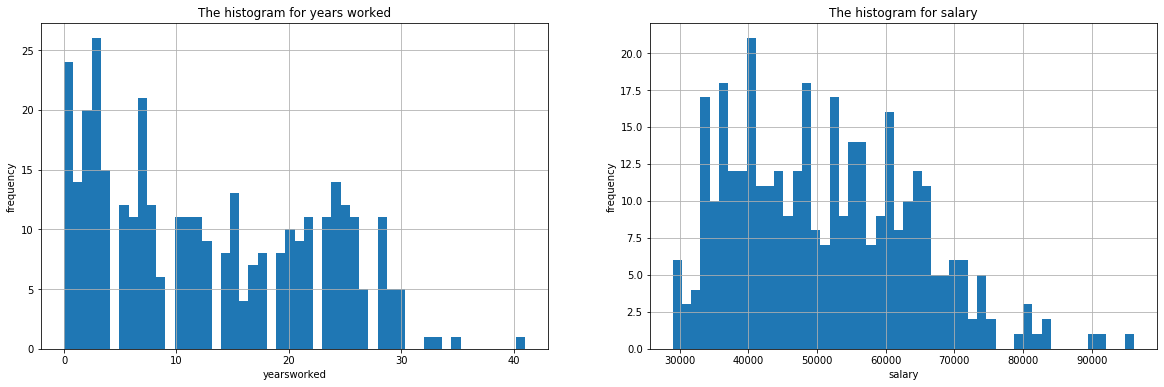

In [20]:
f, axes = plt.subplots(1, 2,figsize=(20, 6))
x_train['yearsworked'].hist(bins=50,ax=axes[0])
x_train['salary'].hist(bins=50,ax=axes[1])
axes[0].set_title('The histogram for years worked')
axes[1].set_title('The histogram for salary')
axes[0].set_xlabel('yearsworked')
axes[1].set_xlabel('salary')
axes[0].set_ylabel('frequency')
axes[1].set_ylabel('frequency')
plt.show()

*For years worked, there are potential outliers,which are above 40 years of experince in the current field.
A lot of individuals have the work experince between 0 and 10 years followed  by between 20 and 32 years
in their current field.*

*For salaries earned 
the peak of salaries is between 37000 dollars and 43000 dollars.There are potential outliers in this data. 
This histogram simply shows that a lot of people earn between 35000 dollars and 47000 dollars. 
Then only a few earn between 83000 dollars and 89000 dollars.
This few is most likey to be the excutive and a lot of people are holding junior positions*

## Extreme values

### Box plots

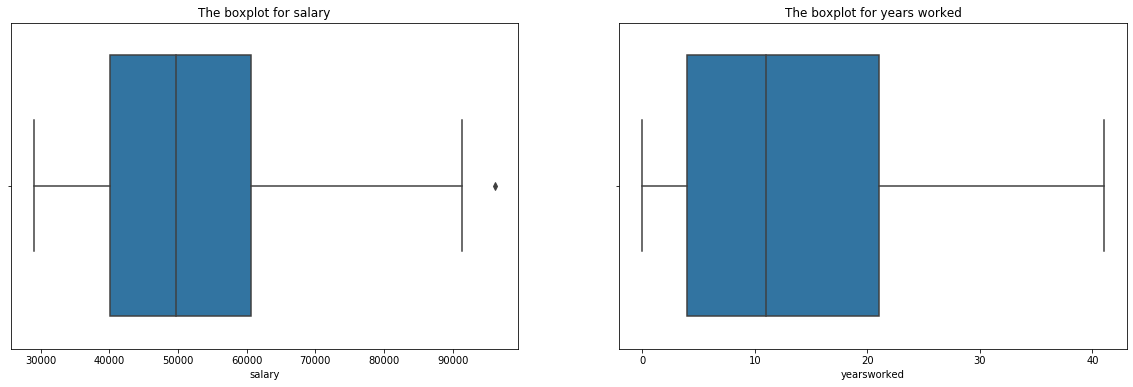

In [22]:
f, axes = plt.subplots(1, 2,figsize=(20, 6))
sns.boxplot(x_train['salary'],ax=axes[0])
sns.boxplot(x_train['yearsworked'],ax=axes[1])
axes[1].set_title('The boxplot for years worked')
axes[0].set_title('The boxplot for salary')

plt.show()

*The boxplot above shows that there is one extreme value of salary in the training data set.*
*With that known, one can choose to remedy the outlier because it may skew the results*
*The boxplot for years worked shows no evident outliers as the histogram has depicted.*

*The outlier is on the further right which is most likely to be on the 99 percentile.*

In [ ]:
Q3 = x_train["salary"].quantile(0.9999999)
x_train[(x_train["salary"] > Q3)]

*The data points of the outlier are:* 
- earns 96156.0 dollars,
- has 12 years of experince in this field,
- has a degree 
- it is a man
- and he is an executive

### The scatter plot showing the relationship between salaries and years worked

In [ ]:
sns.lmplot(x='yearsworked',y='salary',data=x_train)

*The line of best fit shows a strong relationship between years worked and the salary earned. 
There are some outliers which are the furthest points from the line of best fit.*

## Run a simple linear regression for Salary with one predictor variable: Years Worked.

In [ ]:
model1 = smf.ols(formula='salary ~ yearsworked', data=x_train).fit()

In [ ]:
model1.summary()

## Report the amount of variance explained (R^2) and significance value (p)

In [ ]:
print('R-squared is:',model1.rsquared)

#### What percentage of the variance in employees’ salaries is accounted for by the number of years they have worked?

*It reveals that about 37% of the data fit the regression model.*

In [ ]:
print('The p-value for the regression is:', model1.f_pvalue)

*Prob(F) statistics test the overall significance of the regression model.*
*The value of Prob(F) is the probability that the null hypothesis for the full model is true.*
*The null hypothesisis that:*
**All of the regression coefficients are zero.**
**The Prob (F-statistic) value is: 2.27e-37<0.05.**
*This low a value would imply that at least some of the regression parameters are nonzero and that
the regression equation does have some validity in fitting the data.* 
**Therefore the null hypothesis can be rejected.**

## Does the model significantly predict the dependent variable? 


*For this model there is a low R-square and low p-value.*
*This means that the model doesn't explain much of variation of
the data but it is significant which is better than not having a model.*

## What do the 95% confidence intervals [0.025, 0.975] mean?

**A 95% confidence interval is a range of values that you can be 95% certain
that it contains the true mean of the population.**
*Idealy, with regards to the interval,the true population mean value should be on that interval.*
*If a confidence interval does not include a particular value,*
*we can say that it is not likely that the particular value is the true population mean.*
*However, even if a particular value is within the interval,*
*we shouldn't conclude that the population mean equals that specific value.*


*The confidence interval can also be used for coefficients of the regression model*
*Use the confidence interval to assess the estimate of the population coefficient for each term in the model.*

*The coefficient for the years worked is 827.1461.*
*The 95% confidence interval is [714.150,940.143].*
*The coefficient falls on the interval.*
*You can be 95% confident that the confidence interval contains the value of the coefficient for the population.*

*The same applies for the constant coefficient.*

## What does the unstandardized coefficient (B or ‘coef’ in statsmodels) tell you about the relationship between Years Worked and Salary?

*The coefficient of 827.1461 means that as the yerasworked variable increases by 1 year, 
the predicted value of salaries increases by 827.1461 dollars,
i.e using units of the observed values to see the relationship.*

## Expected salary for someone with 12 years’ work experience.

In [ ]:
experience = pd.DataFrame({'yearsworked':[12]})
predict_salary=model1.predict(experience)
p=predict_salary.iloc[0]
print('The expected salary of a person with 12 years experience is:',p,'dollars')


## The expected salary for someone with 80 years’ work experience.

In [ ]:
experience = pd.DataFrame({'yearsworked':[80]})
predict_salary=model1.predict(experience)
p=predict_salary.iloc[0]
print('The expected salary of a person with 80 years experience is:',p,'dollars')

## Are there any problems with this prediction? If so, what are they?

*There were no problems to make this prediction which is a concern because 80 years
of experince is a rare value prediction in this Regression.
What does this mean for the predictive model?*

## We have only looked at the number of years an employee has worked. What other employee characteristics might influence their salary?

*By the correlation map shown in the beginning, the feature that has a good correlation with salary, 
which is even better than the years worked is position.
Years worked at current rank also has a good correlation with salary. 
The rest of the features have less than 50% correlation with salary.
It would not make sense to build a model with features that have no or a very weak relationship with salary*

## Now fit the model to the test set.

#### How does your model compare when running it on the test set - what is the difference in the Root Mean Square Error (RMSE) between the training and test sets? Is there any evidence of overfitting?

In [ ]:
predicted=model1.predict(x_test)
predict = pd.DataFrame(predicted,columns =['Predicted salary'])
result = pd.concat([y_test, predict], axis=1, sort=False)

In [ ]:
result

*Above is the dataframe that shows the actual salaries and the predicted salaries. 
They are different from each other.*

In [ ]:
r=mean_squared_error(y_test,predict)
p=sqrt(r)
print('The RMSE for test set is:',p)

*For a datum which ranges from 30001.0 to 89789.0 , an RMSE of 9012.148714524605 is small* 

In [ ]:
predicted=model1.predict(x_train)

In [ ]:
y=mean_squared_error(y_train,predicted)
x=sqrt(y)
print('The RMSE for train set is:',x)

*For a datum which ranges from 29000.0 to 96156.0 , an RMSE of 10271.059383932115 is small.*

*RMSE measures the average magnitude of the error, therefore it is ideal for the error to be small.
The test set has a very low average error of 9012.148714524605 as compared to the
train set average error of 10271.059383932115. This explains that there is a huge difference between the two.
This could be that the test set is very small OR
The model doesn’t predict new observations as well as it fits the original dataset. 
The results are not generalizable, and there’s a good chance that the model is overfitted.*